In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Upwork/Upwork_Multimedia_Artist.csv",
   "../../Raw_CSV/April 27 - 2022/Upwork/Upwork-Multimedia-Artist.csv",
    "../../Raw_CSV/April 28 - 2022/Upwork/Freelance Multimedia Artist Jobs - Upwork.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")
merge

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_962/1910708438.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")


,Title,Description,Location,Skill,Est.Proj-Budget,Job Type,Contractor Tier,Duration,Title_URL,Job_type,Contractor_tier,Skill_one,Skill_two,skill_three,skill_four,skill_five,skill_six
0,"Graphic designer for Logo, flyers, ads, photo ...",Graphic designers/artists design graphics for ...,None,"Graphic Design', 'Adobe Photoshop', 'Photo Edi...",None,Hourly: $8.50-$20.00,Intermediate,"Less than 1 month, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Write Articles About Video & Photo Software or...,"Hi there,We are looking for a freelancer to wr...",None,"Multimedia Design', 'Article Writing', 'Copywr...",None,Hourly: $5.00-$20.00,Intermediate,"More than 6 months, Hours to be determined",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Coach/Educator for Creative & Entrepreneurial ...,Bet on Baltimore (BoB) is a paid summer intern...,None,"Multimedia Design', 'Education', 'Facilitation...","\n $4,100\n",Fixed-price,Intermediate,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Instructional Design Content Creators - Islami...,Projects Aim: This part of the project is to p...,None,"Multimedia Design', 'Instructional Design', 'P...",None,Hourly,Entry level,"3 to 6 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Graphic Artist (Dedicated),We are seeking a new graphic designer to join ...,None,"Adobe Photoshop', 'Graphic Design', 'Illustrat...",None,Hourly,Intermediate,"More than 6 months, 30+ hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Graphic & Video Editor,"We are looking for an out-of-the-box thinking,...",None,"Video Editing', 'Graphic Design","\n $1,000\n",Fixed-price,Intermediate,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Create Video Courses for us: Blockchain/Crypto...,REMOTE & FREELANCE.The job: to create video ba...,None,"Multimedia Instruction', 'Industry 4.0', 'Emer...",None,Hourly,Intermediate,"1 to 3 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Crowdfunding Specialist Needed for Multimedia ...,I do not want to create more temporary BS to f...,None,"Graphic Design', 'Facebook', 'Social Media Mar...",None,Hourly: $30.00-$55.00,Expert,"More than 6 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Unreal Engine 5 - Lead Artist - Film Productio...,Yo Unreal Engine Jedis!We are building a multi...,None,"Unreal Engine', 'Game Development', '3D Animat...",None,Hourly,Expert,"Less than 1 month, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Urgent need for graphic artist or multimedia p...,"Hi, looking for a part-time Graphic Designer t...",None,"Packaging Design', 'Canva', 'Vector File Forma...",None,Hourly: $10.00,Intermediate,"Less than 1 month, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
merge["Est.Proj-Budget"] = merge["Est.Proj-Budget"].str.strip()

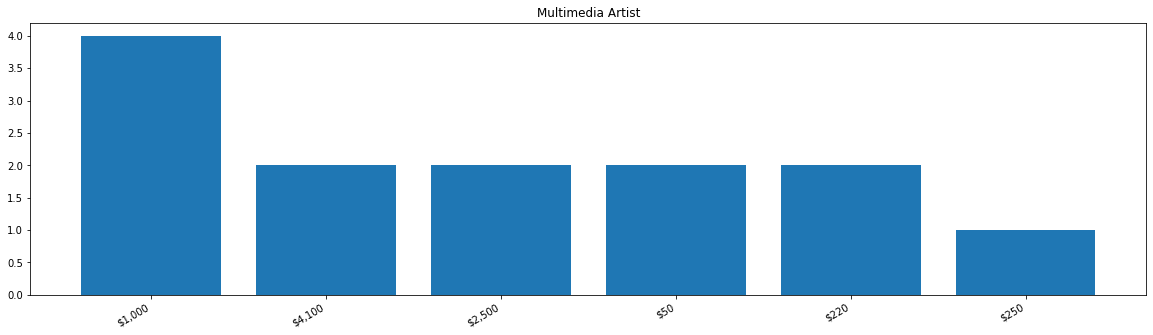

In [4]:
filt = (merge["Est.Proj-Budget"] != "None") & (merge["Est.Proj-Budget"].notna())
filter_est = merge.loc[filt]
count_est = filter_est["Est.Proj-Budget"].value_counts()
plt.figure(figsize=(20, 5))
plt.bar(count_est.index, count_est.values)
plt.title("Multimedia Artist")
plt.xticks(rotation=30, ha="right")
plt.show()



In [5]:
filt_first_tier = merge["Contractor_tier"].fillna("")
# frame_first_tier =  merge.loc[filt_first_tier,"Contractor_tier"]
filt_second_tier = merge["Contractor Tier"].fillna("")
# frame_second_tier = merge.loc[filt_second_tier,"Contractor Tier"]

merge["CT"] = filt_first_tier + filt_second_tier


In [6]:
merge["CT"] = merge["CT"].str.strip()

In [7]:
count_tier = merge["CT"].value_counts()
count_tier

Intermediate    38
Expert          14
Entry level      3
Name: CT, dtype: int64

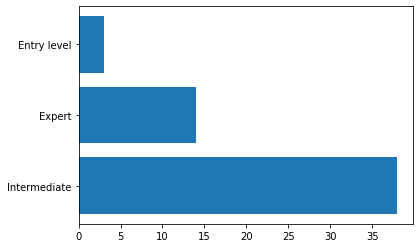

In [8]:
plt.barh(count_tier.index,count_tier.values)
plt.show()

In [9]:
merge["Combine Skills"] =   merge.Skill.fillna("") + " " + merge.Skill_one.fillna("") + "," + merge.Skill_two.fillna(",") + ", " + merge.skill_four.fillna(",") + ", " + merge.skill_three.fillna(",")

In [10]:
merge["Combine Skills"] = merge["Combine Skills"].str.replace("'", "")

In [11]:
merge["Combine Skills"] = merge["Combine Skills"].str.split(",")

In [12]:
skill_append = []
for i in range(len(merge["Combine Skills"])):
    count = merge["Combine Skills"][i]
    for j in range(len(count)):
        skill_append.append(count[j])

In [13]:
skill_without_space = []
filter_skill = list(filter(None, skill_append))
for i in filter_skill:
    if i != " ":
        skill_without_space.append(i)

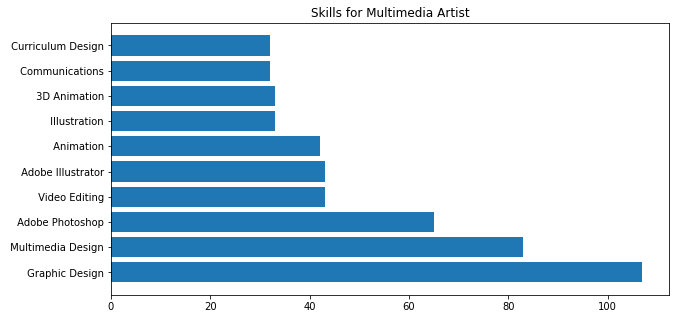

In [14]:
skill_frame = pd.DataFrame(skill_without_space, columns={"Skill"})
count_skill = skill_frame["Skill"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.title("Skills for Multimedia Artist")
plt.barh(count_skill.index,count_skill.values)
plt.show()

In [15]:
merge["JT"] = merge["Job Type"].fillna("") + merge["Job_type"].fillna("")

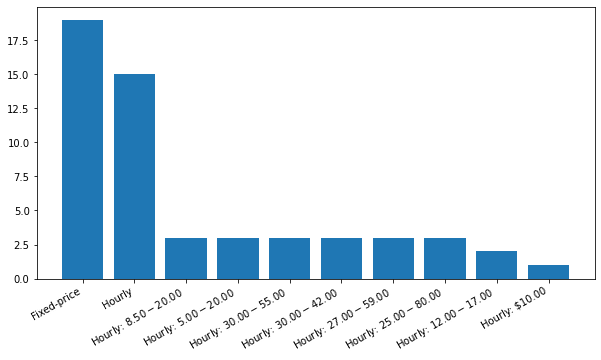

In [16]:
count_jt = merge["JT"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.bar(count_jt.index, count_jt.values)
plt.xticks(rotation="30",ha="right")
plt.show()


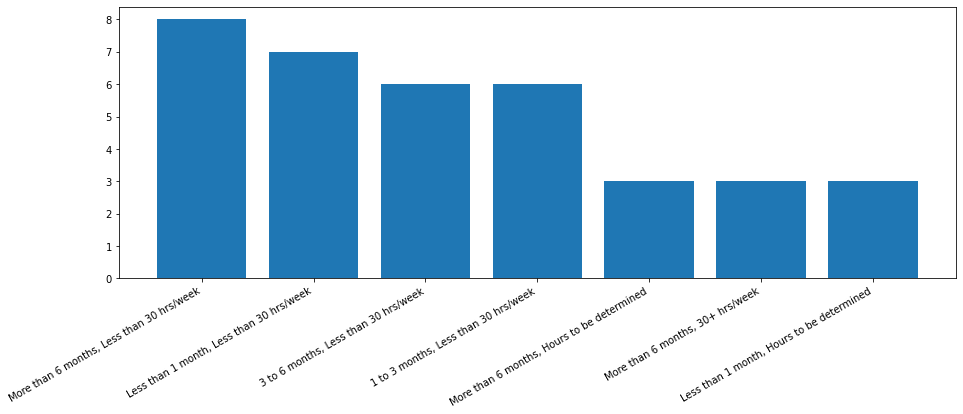

In [17]:
filt_loc = (merge["Duration"] != "None")
merge_duration = merge.loc[filt_loc,"Duration"]
count_duration = merge_duration.value_counts()
plt.figure(figsize=(15,5))
plt.bar(count_duration.index, count_duration.values)
plt.xticks(rotation="30",ha="right")
plt.show()

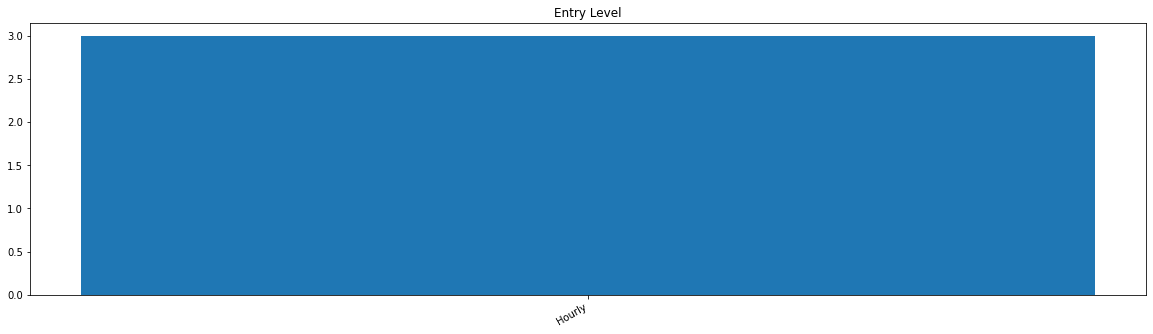

In [18]:
filt = (merge["CT"] == "Entry level")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Entry Level")
plt.xticks(rotation="30", ha="right")
plt.show()


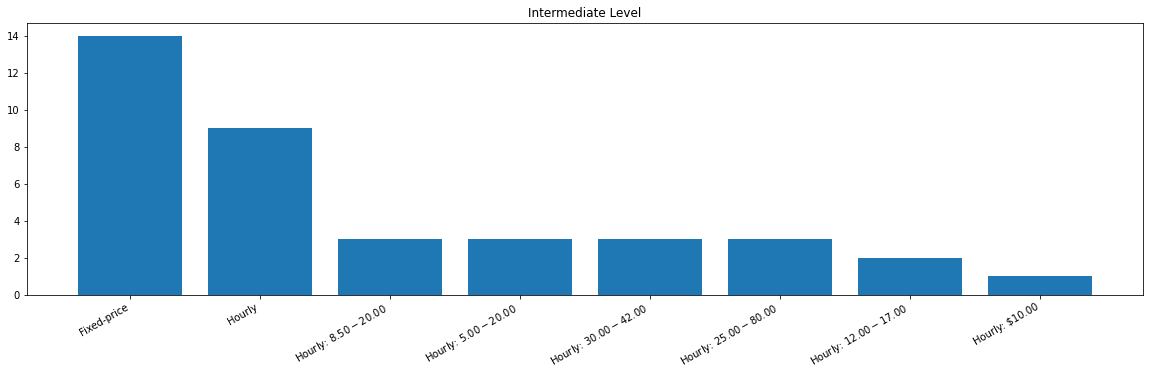

In [19]:
filt = (merge["CT"] == "Intermediate")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Intermediate Level")
plt.xticks(rotation="30", ha="right")
plt.show()

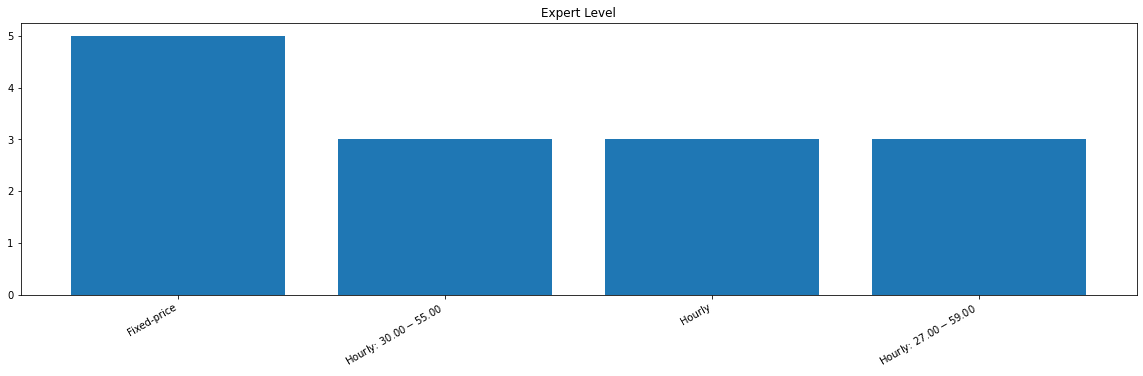

In [20]:
filt = (merge["CT"] == "Expert")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Expert Level")
plt.xticks(rotation="30", ha="right")
plt.show()

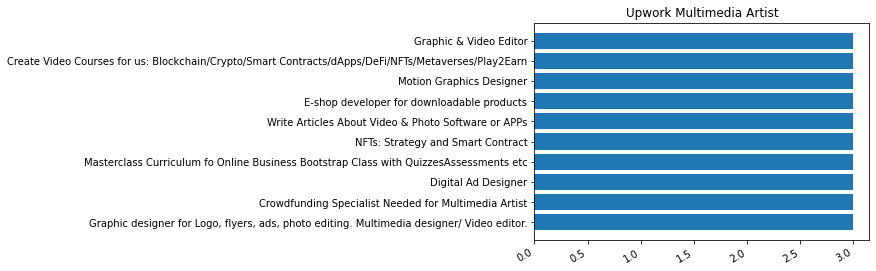

In [21]:
count_job_title = merge["Title"].value_counts()[0:10]
plt.barh(count_job_title.index, count_job_title.values)
plt.title("Upwork Multimedia Artist")
plt.xticks(rotation="30",ha="right")
plt.show()